In [ ]:
# Get access to drive folder
from google.colab import drive
drive.mount('/content/drive' , force_remount=True)
FOLDERNAME = 'Colab Notebooks/KNearestNeighbor'
assert FOLDERNAME is not None , "[!] Enter the foldername"

import sys
sys.path.append('/content/drive/MyDrive/{}'.format(FOLDERNAME))
%cd drive/My\ Drive/$FOLDERNAME/

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/KNearestNeighbor


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from KNearestNeighbor import KNearestNeighbor

In [ ]:
# Create all points and labels from rectangle.txt
points = []

f = open("rectangle.txt", "r")
for line in f:
  words = line.split()
  points.append([float(words[0]), float(words[1]), float(words[2])])
f.close()

In [ ]:
# set optional knn hyperparameters
num_iters = 100
k_choices = [1, 3, 5, 7, 9]
dist_func = ["l1", "l2", "linf"]

train_errors = np.zeros((len(dist_func),len(k_choices)))
test_errors = np.zeros((len(dist_func),len(k_choices)))
knn_best_result = 1

for i in range(num_iters):
    # randomly split point to half train and half test
    train, test = train_test_split(np.array(points), test_size=0.5, shuffle=True)
    train_x, train_y = train[:,:2], train[:,2]
    test_x, test_y = test[:,:2], test[:,2]

    for (i, func) in enumerate(dist_func):
        for (j, k) in enumerate(k_choices):
            # create a kNN classifier instance and compute the predictions
            knn_classifier = KNearestNeighbor()
            knn_classifier.train(train_x, train_y)
            pred_train = knn_classifier.predict(train_x, k=k, dist_func=func) 
            pred_test = knn_classifier.predict(test_x, k=k, dist_func=func) 

            # calculate errors on train and test set
            train_errors[i][j] += np.sum(pred_train != train_y)/len(train_y)
            test_acc = np.sum(pred_test != test_y)/len(test_y)
            test_errors[i][j] += test_acc

            # save best model
            if test_acc < knn_best_result:
                knn_best_result = test_acc
                knn_best_model = knn_classifier

train_errors /= num_iters
test_errors /= num_iters

In [ ]:
# print results
np.set_printoptions(precision=4)
print ("train mean error: \n", train_errors, "\n")
print ("test mean error: \n", test_errors, "\n")

train mean error: 
 [[0.     0.0264 0.0351 0.0429 0.0513]
 [0.     0.0217 0.0351 0.0488 0.0577]
 [0.     0.0219 0.0384 0.0524 0.0681]] 

test mean error: 
 [[0.0671 0.0596 0.0611 0.0677 0.0737]
 [0.062  0.0587 0.066  0.0739 0.0808]
 [0.0637 0.0632 0.0724 0.0832 0.0947]] 



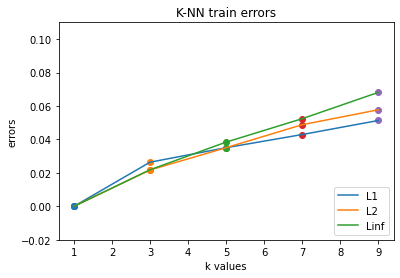

In [ ]:
# plot the train results
l1, l2, linf = [], [], []
for (i, k) in enumerate(k_choices):
    plt.scatter([k] * len(dist_func), train_errors[:,i])

# create line between all k values for each distance function
plt.errorbar(k_choices, train_errors[0,:], label ='L1')
plt.errorbar(k_choices, train_errors[1,:], label ='L2')
plt.errorbar(k_choices, train_errors[2,:], label ='Linf')
plt.legend(loc ='lower right')

plt.title('K-NN train errors')
plt.xlabel('k values')
plt.ylabel('errors')
plt.ylim(-0.02, 0.11)
plt.show()

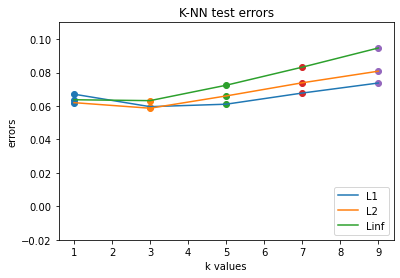

In [ ]:
# plot the test results
l1, l2, linf = [], [], []
for (i, k) in enumerate(k_choices):
    plt.scatter([k] * len(dist_func), test_errors[:,i])

# create line between all k values for each distance function
plt.errorbar(k_choices, test_errors[0,:], label ='L1')
plt.errorbar(k_choices, test_errors[1,:], label ='L2')
plt.errorbar(k_choices, test_errors[2,:], label ='Linf')
plt.legend(loc ='lower right')

plt.title('K-NN test errors')
plt.xlabel('k values')
plt.ylabel('errors')
plt.ylim(-0.02, 0.11)
plt.show()